In [3]:
import numpy as np
from experiments.utils.SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from experiments.utils.get_avg_classwise_f1 import get_avg_classwise_f1
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from scipy import stats



In [2]:
#96 globe - 200, squad 1000
# coil 500, squad 1000
# rna 200, squad 2000
# mnist  squad 2000
# fmnist

In [14]:
rna = DataFetcher.fetch_data('rna N3k')
coli20 =  DataFetcher.fetch_data('coil20')
globe = DataFetcher.fetch_data('globe', size=3000)
fmnist = DataFetcher.fetch_data('fashion mnist', size=3000)
mnist = DataFetcher.fetch_data('mnist', size=3000)

datasets = [rna, coli20,globe,fmnist, mnist]
dataset_names = ['rna N3k', 'coli20', 'globe', 'fashion mnist', 'mnist']

####################
Dataset loaded
Dataset shape: (2000, 784)
####################
####################
Fetching the "mnist" dataset


C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


####################
Dataset loaded
Dataset shape: (2000, 784)
####################
####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)
####################
####################
Fetching the "globe" dataset
####################
Dataset loaded
Dataset shape: (3003, 3)
####################
####################
Fetching the "fashion mnist" dataset
####################
Dataset loaded
Dataset shape: (3000, 784)
####################
####################
Fetching the "mnist" dataset
####################
Dataset loaded
Dataset shape: (3000, 784)
####################


In [ ]:
metric_collection_96 = {'Average speed': 1, "Stress": 200}

iters_chalmers = 2000
iters_squad = 500
layouts = []

for dataset in datasets[3:]:

    Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
    Xld *= 10/np.std(Xld)
    algo96 = Chalmers96(dataset=dataset,  initial_layout=Xld,
                        damping_constant=0, spring_constant=0.5,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5)

    layout_96 = LayoutCreation.create_layout(algo96, optional_metric_collection=metric_collection_96, no_iters=iters_chalmers)
    show_layout(layout_96, use_labels=True, title="96")
    show_generation_metrics(layout_96, iters_from=100, average_speed=True, title=f"Chalmers' 96, {dataset.name.capitalize()}")
    show_generation_metrics(layout_96, average_speed=True, title=f"Chalmers' 96, {dataset.name.capitalize()}")

    metric_collection_squad = { "Stress": 200, "Average n-tet stress": 1}
    squad = SNeD(dataset=dataset, initial_layout=Xld, use_nesterovs_momentum=False, ntet_size=4)
    layout_squad = LayoutCreation.create_layout(squad, no_iters=iters_squad,optional_metric_collection=metric_collection_squad)
    show_layout(layout_squad, use_labels=True, title="SQuaD")
    show_generation_metrics(layout_squad, iters_from=100, quartet_stress=True, title=f"SQuaD, {dataset.name.capitalize()}")
    show_generation_metrics(layout_squad, quartet_stress=True, title=f"SQuaD, {dataset.name.capitalize()}")


    layouts.append((layout_96, layout_squad))



output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()

path_to_pickle_lay = (Path(output_dir).joinpath(Path(f"other_layouts.pickle"))).resolve()
with open(path_to_pickle_lay, 'wb') as pickle_out:
    pickle.dump(layouts, pickle_out)



Not enough memory to allocate for a numpy array for stress calculation. 
Stress will be calculated with a Python loop

 Computing un-vectorised euclidean stress 


Not enough memory to allocate for a numpy array for stress calculation. 
Stress will be calculated with a Python loop

 Computing un-vectorised euclidean stress 


Not enough memory to allocate for a numpy array for stress calculation. 
Stress will be calculated with a Python loop

 Computing un-vectorised euclidean stress 


Not enough memory to allocate for a numpy array for stress calculation. 
Stress will be calculated with a Python loop

 Computing un-vectorised euclidean stress 


Not enough memory to allocate for a numpy array for stress calculation. 
Stress will be calculated with a Python loop

 Computing un-vectorised euclidean stress 



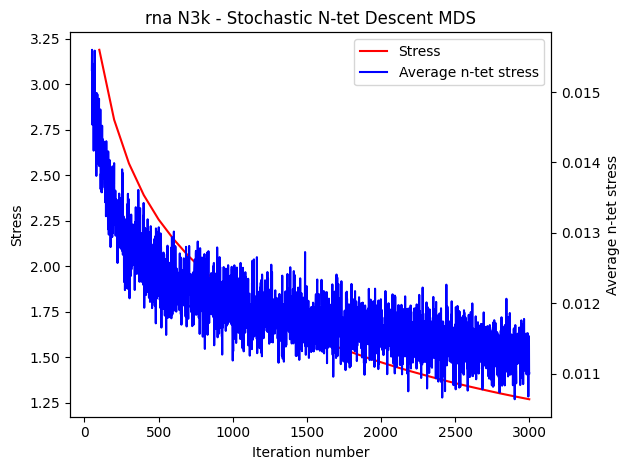

In [10]:


output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()

path_to_pickle = (Path(output_dir).joinpath(Path(f"rna_layouts.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    layouts = pickle.load(file)

show_generation_metrics(layout=layouts[0], quartet_stress=True, iters_from=50)

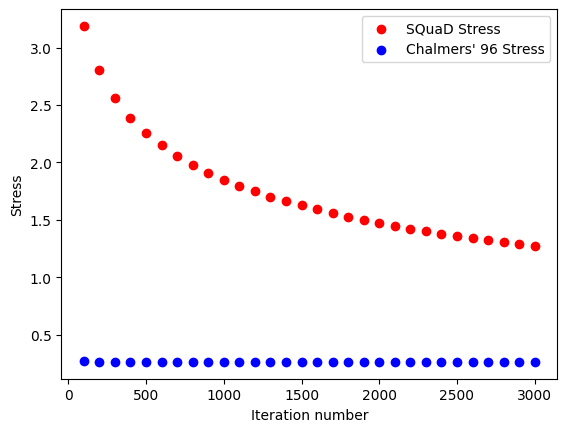

100
100


In [16]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()

ax.scatter(layouts[0].collected_metrics["Stress"][0][1:], layouts[0].collected_metrics["Stress"][1][1:], c='r', label= "SQuaD Stress")

ax.scatter(layouts[1].collected_metrics["Stress"][0][1:], layouts[1].collected_metrics["Stress"][1][1:], c='b', label= "Chalmers' 96 Stress")
plt.legend()
ax.set_ylabel("Stress")
ax.set_xlabel("Iteration number")
plt.show()

print(layouts[0].collected_metrics["Stress"][0][1])
print(layouts[1].collected_metrics["Stress"][0][1])

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
"Average n-tet stress" will be measured on every iteration
####################
"Stress" will be measured every 200 iterations
####################
All stress calculations will be performed using the euclidian norm
####################

 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 

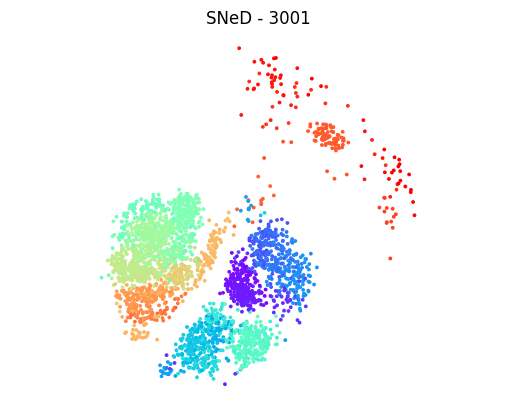

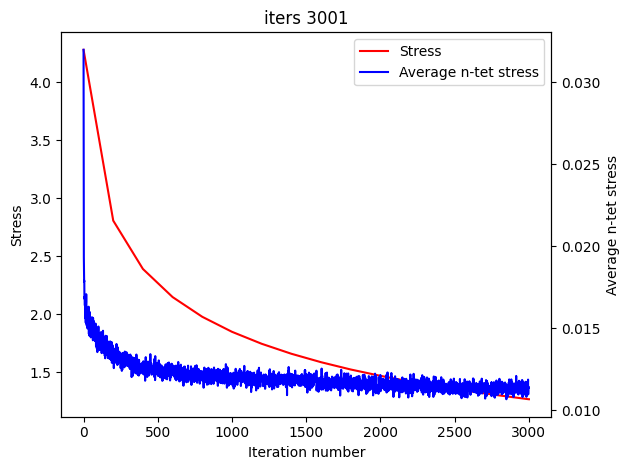

####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
"Average n-tet stress" will be measured on every iteration
####################
"Stress" will be measured every 200 iterations
####################
All stress calculations will be performed using the euclidian norm
####################

 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing

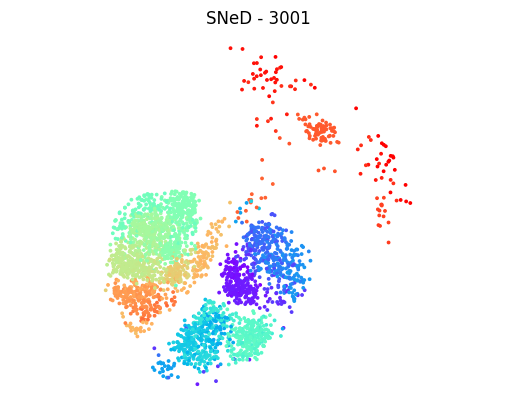

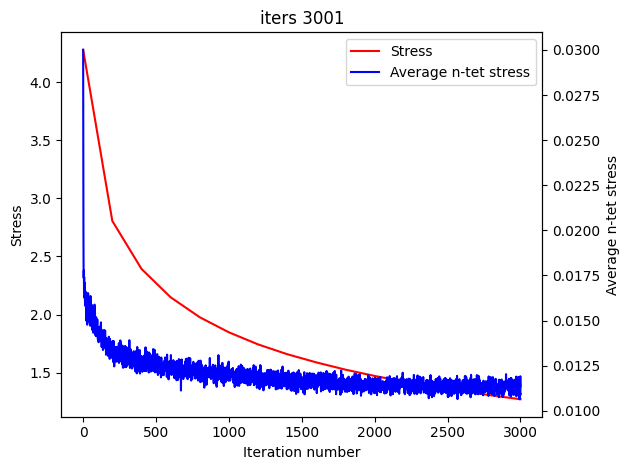

####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
"Average n-tet stress" will be measured on every iteration
####################
"Stress" will be measured every 200 iterations
####################
All stress calculations will be performed using the euclidian norm
####################

 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing

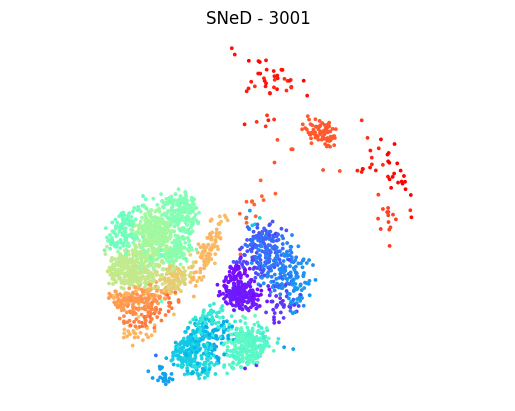

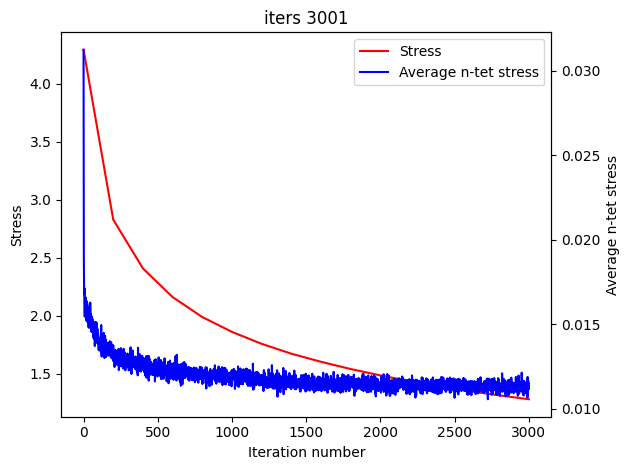

In [10]:
from sklearn.decomposition import PCA
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.visualise_layouts_and_metrics.plot import show_layout, show_generation_metrics
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan
import numpy as np
import matplotlib.pyplot as plt
from experiments.cube.Cube import Cube


all_datasets_list = ['poker', 'mnist', 'bonds', 'coil20', 'rna N3k', 'airfoil', 'wine quality', 'fashion mnist'
                                                                                                'shuttle',
                     'flow cytometry']

cube = Cube(num_points=100, side=30, angle=0.4)
dataset_cube= cube.get_sample_dataset(3000)



metric_collection = { "Average n-tet stress": 1, "Stress": 200}
dataset = DataFetcher.fetch_data('rna N3k')

Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)
random_initial =  10*np.random.randn(dataset.data.shape[0], 2)
layouts = []

for iter in [500, 1000, 6000]:

    squad = SNeD(dataset=dataset, initial_layout=Xld, use_nesterovs_momentum=False, ntet_size=4, use_relative_dist=True)
    layout = LayoutCreation.create_layout(squad, no_iters=6000,optional_metric_collection=metric_collection, use_decay=False)
    show_layout(layout, use_labels=True, color_map='rainbow', title=f"SNeD - {layout.iteration_number}")
    show_generation_metrics(layout, quartet_stress=True, title=f"iters {layout.iteration_number}" )
    # print(layout.get_final_positions())

    # cube.plot_2d(hd_points=layout.get_data(), layout_points=layout.get_final_positions(), title="no shuffle")
    layouts.append(layout)

path_to_pickle_lay = (Path(output_dir).joinpath(Path(f"iter_numbers_layouts.pickle"))).resolve()
with open(path_to_pickle_lay, 'wb') as pickle_out:
    pickle.dump(layouts, pickle_out)


# print(layout.collected_metrics)
# fig, axis = plt.subplots()
# axis.scatter(Xld[:,0], Xld[:,1], c=dataset.labels, cmap='rainbow')

